In [1]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from rasterio.windows import Window
import glob
from collections import defaultdict
from rasterio.merge import merge

In [2]:
dategroups = defaultdict(list)
image_dir ='../Downloads/aug2624_psscene_visual/PSScene'
tif_files = glob.glob(os.path.join(image_dir, '*.tif'))
for tif_file in tif_files:
    filename = os.path.basename(tif_file)
    date = filename.split('_')[0]
#     print(date)
    dategroups[date].append(tif_file)

In [3]:
for date, files in dategroups.items():
    src_files_to_mosaic = []
    for tif_file in files:
        src = rasterio.open(tif_file)
        src_files_to_mosaic.append(src)
        print(src_files_to_mosaic)
        
    mosaic, out_transform = merge(src_files_to_mosaic)
    
    out_meta = src_files_to_mosaic[0].meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_transform
    })
    output_path = f'mosaic_{date}.tif'
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)
        
    for src in src_files_to_mosaic:
        src.close()

[<open DatasetReader name='../Downloads/aug2624_psscene_visual/PSScene/20240826_160108_86_24c6_3B_Visual_clip.tif' mode='r'>]
[<open DatasetReader name='../Downloads/aug2624_psscene_visual/PSScene/20240826_160108_86_24c6_3B_Visual_clip.tif' mode='r'>, <open DatasetReader name='../Downloads/aug2624_psscene_visual/PSScene/20240826_160106_50_24c6_3B_Visual_clip.tif' mode='r'>]
[<open DatasetReader name='../Downloads/aug2624_psscene_visual/PSScene/20240826_160108_86_24c6_3B_Visual_clip.tif' mode='r'>, <open DatasetReader name='../Downloads/aug2624_psscene_visual/PSScene/20240826_160106_50_24c6_3B_Visual_clip.tif' mode='r'>, <open DatasetReader name='../Downloads/aug2624_psscene_visual/PSScene/20240826_160111_22_24c6_3B_Visual_clip.tif' mode='r'>]


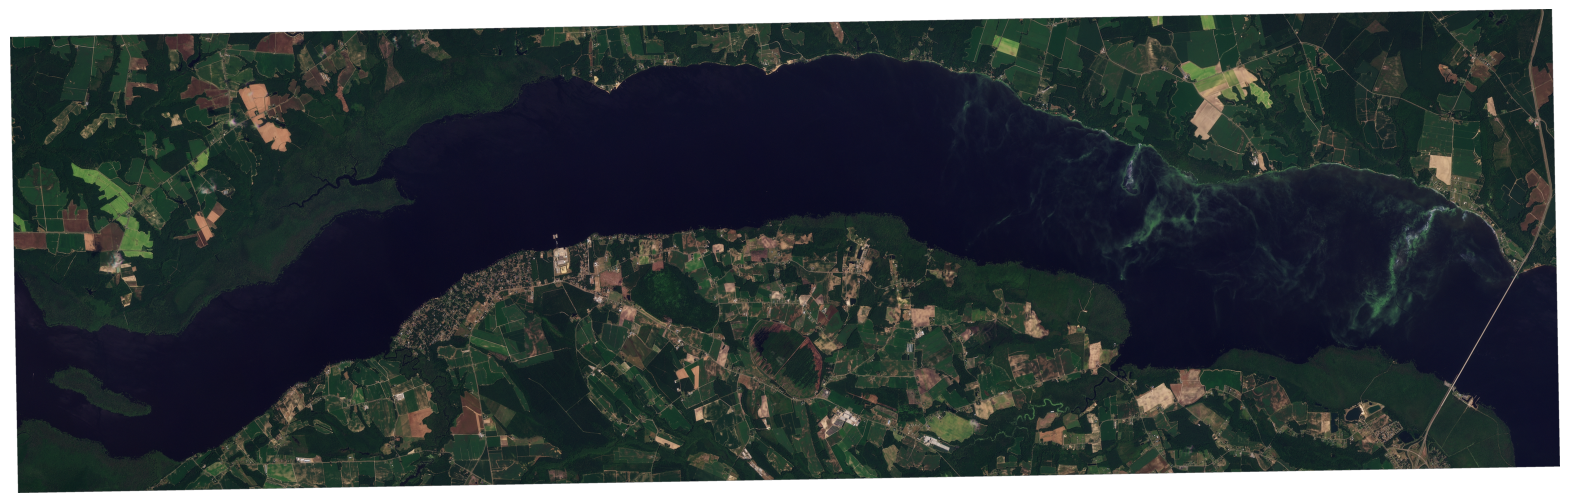

In [4]:
# img = np.mo
fig,ax = plt.subplots(1,1, figsize = (20,7))
ax.imshow(mosaic.T)
ax.axis('off')
plt.show()
# plt.savefig('1102bloom.tiff')

In [4]:
lat, lon = 36.272006, -76.675842
x,y = 500,500
        
for fi in sorted(os.listdir(image_path)):
    if fi.endswith(".tif"):
        working_path = os.path.join(image_path, fi)
        with rasterio.open(working_path) as rds:
            
            transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
            xx, yy = transformer.transform(lon, lat)
            row, col = rds.index(xx, yy)
            if row > x and col > y:
                try:
                    window = Window.from_slices(rows = (row-x, row+x), cols =(col-y, col+y))
                    data = rds.read(window=window)
                    data = np.moveaxis(data, 0, 2) 
                    img_arr = np.array(data)
                    black_space = np.mean(img_arr[:,:,:]/255)

                    if black_space < 0.25 or black_space >= 0.9 or img_arr.shape[0] != x*2 or img_arr.shape[1] != y*2 or img_arr.shape[2] != 4:
                        print(f'blank_space:{black_space}')
#                         plt.imshow(data)
#                         plt.axis('off')
#                         plt.show()
                    else:
                        plt.imshow(img_arr[:,:,:3])
                        plt.title(fi)
                        plt.axis('off')
                        plt.show()
#                         im = Image.fromarray(data)
#                         im.save(image_path+'/'+cropped_img_folder_name+'/'+str(fi))  
#                         print(f'Image saved for {fi}')
                        
                except Exception as e:
                    print(e)
                    pass
            else: pass

            if row < x or col <y:
                print('invalid row or col length: ',row, col)
                pass    

FileNotFoundError: [Errno 2] No such file or directory: 'mosaic'